In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


## Objective

To determine which campaign (Control vs. Test) performs better in driving user engagement and conversions.Develop a framework to evaluate the effectiveness of marketing strategies by conducting A/B testing on user engagement metrics such as click-through rates (CTR) and conversion rates.

## Step-1: Data Loading and cleaning

In [2]:
df_control_gp = pd.read_csv("/kaggle/input/ab-testing-dataset/control_group.csv",sep=";")
df_test_gp = pd.read_csv("/kaggle/input/ab-testing-dataset/test_group.csv",sep=";")

### Control group dataset

In [3]:
df_control_gp.shape

(30, 10)

In [4]:
df_control_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


#### Indentifying Null and missing values 

In [5]:
df_control_gp.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

#### Display rows with any Null values

In [6]:
df_control_gp[df_control_gp.isna().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As the row doesn't provide any useful data, we can drop it

In [7]:
df_control_gp.dropna(inplace=True)

In [8]:
df_control_gp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [9]:
df_control_gp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        29 non-null     object 
 1   Date                 29 non-null     object 
 2   Spend [USD]          29 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [10]:
df_control_gp['Date'] = pd.to_datetime(df_control_gp['Date'], format = "%d.%m.%Y")

In [11]:
df_control_gp['Date'].unique()

<DatetimeArray>
['2019-08-01 00:00:00', '2019-08-02 00:00:00', '2019-08-03 00:00:00',
 '2019-08-04 00:00:00', '2019-08-06 00:00:00', '2019-08-07 00:00:00',
 '2019-08-08 00:00:00', '2019-08-09 00:00:00', '2019-08-10 00:00:00',
 '2019-08-11 00:00:00', '2019-08-12 00:00:00', '2019-08-13 00:00:00',
 '2019-08-14 00:00:00', '2019-08-15 00:00:00', '2019-08-16 00:00:00',
 '2019-08-17 00:00:00', '2019-08-18 00:00:00', '2019-08-19 00:00:00',
 '2019-08-20 00:00:00', '2019-08-21 00:00:00', '2019-08-22 00:00:00',
 '2019-08-23 00:00:00', '2019-08-24 00:00:00', '2019-08-25 00:00:00',
 '2019-08-26 00:00:00', '2019-08-27 00:00:00', '2019-08-28 00:00:00',
 '2019-08-29 00:00:00', '2019-08-30 00:00:00']
Length: 29, dtype: datetime64[ns]

In [12]:
df_control_gp.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [13]:
df_control_gp.rename(columns={
    'Campaign Name': 'Campaign',
    'Date': 'Date',
    'Spend [USD]': 'Spend_USD',
    '# of Impressions': 'Impressions',
    'Reach': 'Reach',
    '# of Website Clicks': 'Website_Clicks',
    '# of Searches': 'Searches',
    '# of View Content': 'Views',
    '# of Add to Cart': 'Add_to_Cart',
    '# of Purchase': 'Purchases'
}, inplace=True)


### Adding Day

In [14]:
df_control_gp['Day'] = df_control_gp['Date'].dt.day_name()

In [15]:
import holidays
# Add a column indicating if the date is a weekend
df_control_gp['Is_Weekend'] = df_control_gp['Day'].isin(['Saturday', 'Sunday'])

# Define the country-specific holidays (e.g., US holidays)
country_holidays = holidays.US(years=df_control_gp['Date'].dt.year.unique())

# Add a column indicating if the date is a holiday
df_control_gp['Is_Holiday'] = df_control_gp['Date'].isin(country_holidays)

/tmp/ipykernel_17/848399663.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_control_gp['Is_Holiday'] = df_control_gp['Date'].isin(country_holidays)


In [16]:
df_control_gp.head()

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases,Day,Is_Weekend,Is_Holiday
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Thursday,False,False
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Friday,False,False
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Saturday,True,False
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Sunday,True,False
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,Tuesday,False,False


#### Adding CTR (Click-Through Rate) to measure the effectiveness of campaigns in driving clicks

In [17]:
df_control_gp['CTR_%'] = round(((df_control_gp['Website_Clicks']/df_control_gp['Impressions'])*100),2)

In [18]:
df_control_gp.head()

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases,Day,Is_Weekend,Is_Holiday,CTR_%
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Thursday,False,False,8.48
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Friday,False,False,6.70
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Saturday,True,False,4.94
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Sunday,True,False,4.21
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,Tuesday,False,False,3.69


#### Adding Conversion Rate to measures the efficiency of converting clicks to purchases

In [19]:
df_control_gp['Conversion_Rate_%'] = round(((df_control_gp['Purchases']/df_control_gp['Website_Clicks'])*100),2)

#### Adding Cost per Purchase (CPP) to measures the cost-effectiveness of the campaign.

In [20]:
df_control_gp['CPP'] = round(((df_control_gp['Spend_USD']/df_control_gp['Purchases'])*100),2)

In [21]:
df_control_gp

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases,Day,Is_Weekend,Is_Holiday,CTR_%,Conversion_Rate_%,CPP
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Thursday,False,False,8.48,8.81,368.93
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Friday,False,False,6.70,6.30,343.84
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Saturday,True,False,4.94,5.72,629.84
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Sunday,True,False,4.21,11.09,570.59
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,Tuesday,False,False,3.69,18.97,403.53
6,Control Campaign,2019-08-07,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,Wednesday,False,False,1.86,18.90,509.82
7,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,Thursday,False,False,7.98,6.36,411.26
8,Control Campaign,2019-08-09,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,Friday,False,False,5.11,8.08,561.48
9,Control Campaign,2019-08-10,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,Saturday,True,False,1.94,32.24,292.78
10,Control Campaign,2019-08-11,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0,Sunday,True,False,7.06,5.84,524.21


### Test group dataset

In [22]:
df_test_gp.shape

(30, 10)

In [23]:
df_test_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [24]:
df_control_gp.isna().sum()

Campaign             0
Date                 0
Spend_USD            0
Impressions          0
Reach                0
Website_Clicks       0
Searches             0
Views                0
Add_to_Cart          0
Purchases            0
Day                  0
Is_Weekend           0
Is_Holiday           0
CTR_%                0
Conversion_Rate_%    0
CPP                  0
dtype: int64

In [25]:
df_test_gp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


#### Converting date format

In [26]:
df_test_gp['Date'] = pd.to_datetime(df_test_gp['Date'], format = "%d.%m.%Y")

In [27]:
df_test_gp.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [28]:
df_test_gp['Day'] = df_test_gp['Date'].dt.day_name()
import holidays
# Add a column indicating if the date is a weekend
df_test_gp['Is_Weekend'] = df_test_gp['Day'].isin(['Saturday', 'Sunday'])

# Define the country-specific holidays (e.g., US holidays)
country_holidays = holidays.US(years=df_test_gp['Date'].dt.year.unique())

# Add a column indicating if the date is a holiday
df_test_gp['Is_Holiday'] = df_test_gp['Date'].isin(country_holidays)

/tmp/ipykernel_17/983479078.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_test_gp['Is_Holiday'] = df_test_gp['Date'].isin(country_holidays)


In [29]:
df_test_gp.rename(columns={
    'Campaign Name': 'Campaign',
    'Date': 'Date',
    'Spend [USD]': 'Spend_USD',
    '# of Impressions': 'Impressions',
    'Reach': 'Reach',
    '# of Website Clicks': 'Website_Clicks',
    '# of Searches': 'Searches',
    '# of View Content': 'Views',
    '# of Add to Cart': 'Add_to_Cart',
    '# of Purchase': 'Purchases'
}, inplace=True)


In [30]:
df_test_gp.head()

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases,Day,Is_Weekend,Is_Holiday
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255,Thursday,False,False
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677,Friday,False,False
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578,Saturday,True,False
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340,Sunday,True,False
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768,Monday,False,False


#### Adding performance metrics [CTR,Conversion Rate and CPP] to test campaign dataset

In [31]:
df_test_gp['CTR_%'] = round(((df_test_gp['Website_Clicks']/df_test_gp['Impressions'])*100),2)
df_test_gp['Conversion_Rate_%'] = round(((df_test_gp['Purchases']/df_test_gp['Website_Clicks'])*100),2)
df_test_gp['CPP'] = round(((df_test_gp['Spend_USD']/df_test_gp['Purchases'])*100),2)

In [32]:
df_test_gp

,Campaign,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,Views,Add_to_Cart,Purchases,Day,Is_Weekend,Is_Holiday,CTR_%,Conversion_Rate_%,CPP
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255,Thursday,False,False,7.68,8.39,1179.61
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677,Friday,False,False,4.62,14.54,375.48
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578,Saturday,True,False,11.22,7.33,409.17
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340,Sunday,True,False,5.37,8.06,797.06
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768,Monday,False,False,5.13,13.10,299.09
5,Test Campaign,2019-08-06,2458,42684,31489,7488,1854,1073,882,488,Tuesday,False,False,17.54,6.52,503.69
6,Test Campaign,2019-08-07,2838,53986,42148,4221,2733,2182,1301,890,Wednesday,False,False,7.82,21.09,318.88
7,Test Campaign,2019-08-08,2916,33669,20149,7184,2867,2194,1240,431,Thursday,False,False,21.34,6.00,676.57
8,Test Campaign,2019-08-09,2652,45511,31598,8259,2899,2761,1200,845,Friday,False,False,18.15,10.23,313.85
9,Test Campaign,2019-08-10,2790,95054,79632,8125,2312,1804,424,275,Saturday,True,False,8.55,3.38,1014.55


## Step-2: Data Exploration

### Analysing Total Campaign spends

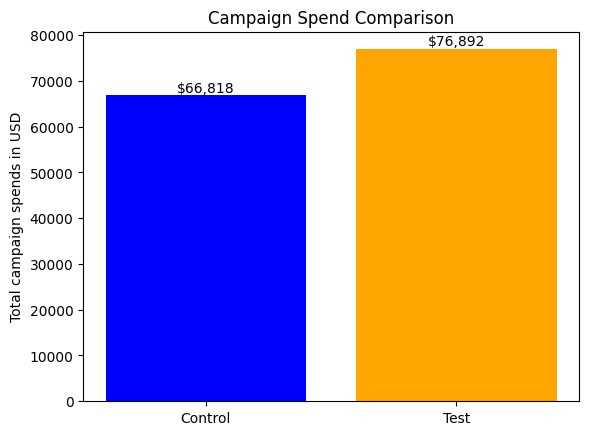

In [33]:
import matplotlib.pyplot as plt

# Calculate total spend for each campaign
spend_control = df_control_gp['Spend_USD'].sum()
spend_test = df_test_gp['Spend_USD'].sum()

# Create the bar chart
plt.bar(["Control", "Test"], [spend_control, spend_test], color=["blue", "orange"])
plt.ylabel("Total campaign spends in USD")
plt.title("Campaign Spend Comparison")

# Annotate totals on top of the bars
for i, spend in enumerate([spend_control, spend_test]):
    plt.text(i, spend + 100, f"${spend:,.0f}", ha='center', va='bottom', fontsize=10, color="black")

# Show the plot
plt.show()


### Analysing Conversion rate

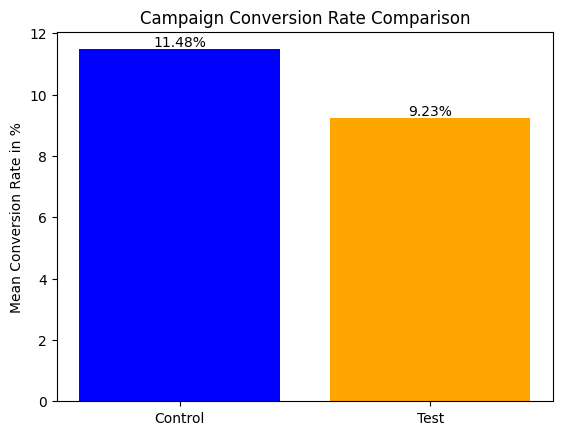

In [34]:
import matplotlib.pyplot as plt

# Calculate mean conversion rate for each campaign
conversion_rate_control = df_control_gp['Conversion_Rate_%'].mean()
conversion_rate_test = df_test_gp['Conversion_Rate_%'].mean()

# Create the bar chart
plt.bar(["Control", "Test"], [conversion_rate_control, conversion_rate_test], color=["blue", "orange"])
plt.ylabel("Mean Conversion Rate in %")
plt.title("Campaign Conversion Rate Comparison")

# Annotate mean conversion rates on top of the bars
for i, rate in enumerate([conversion_rate_control, conversion_rate_test]):
    plt.text(i, rate , f"{rate:.2f}%", ha='center', va='bottom', fontsize=10, color="black")  # Adjusting +0.5 for better positioning

# Show the plot
plt.show()


In [35]:
# Split into control and test groups
control = df_control_gp
test = df_test_gp

# Calculate average metrics
metrics = ['CTR_%', 'Conversion_Rate_%', 'CPP']
control_means = control[metrics].mean()
test_means = test[metrics].mean()

comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Control Campaign': control_means,
    'Test Campaign': test_means
}).set_index('Metric')

comparison_df


,Control Campaign,Test Campaign
Metric,,
CTR_%,5.095517,10.241667
Conversion_Rate_%,11.477586,9.230667
CPP,505.234828,589.959667


- Analysis:
    - Click-Through Rate(CTR %)
        - The Test Campaign significantly outperforms the Control Campaign in CTR (10.24% vs. 5.10%).
    - Conversion Rate (%)
        - The Control Campaign shows a slightly higher Conversion Rate (11.48% vs. 9.23%),this suggests that both campaigns perform similarly in converting clicks to purchases.
    - Cost per Purchase (CPP)
        - The Test Campaign has a higher CPP ( USD 589.96 vs. USD 505.23), meaning it is more expensive to acquire a customer.

### Analysing the influence of Weekends

In [36]:
# Filter data for weekends
control_weekend = df_control_gp[df_control_gp['Is_Weekend'] == True]
test_weekend = df_test_gp[df_test_gp['Is_Weekend'] == True]

# Calculate average metrics for weekends
control_means_weekend = control_weekend[metrics].mean()
test_means_weekend = test_weekend[metrics].mean()

# Create a comparison DataFrame for weekend analysis
comparison_weekend_df = pd.DataFrame({
    'Metric': metrics,
    'Control Campaign (Weekend)': control_means_weekend,
    'Test Campaign (Weekend)': test_means_weekend
}).set_index('Metric')

# Display the comparison DataFrame for weekends
print(comparison_weekend_df)


                   Control Campaign (Weekend)  Test Campaign (Weekend)
Metric                                                                
CTR_%                                 4.95375                  9.15750
Conversion_Rate_%                    10.62875                  8.14625
CPP                                 575.22250                675.28125


### Day-wise CTR comparison

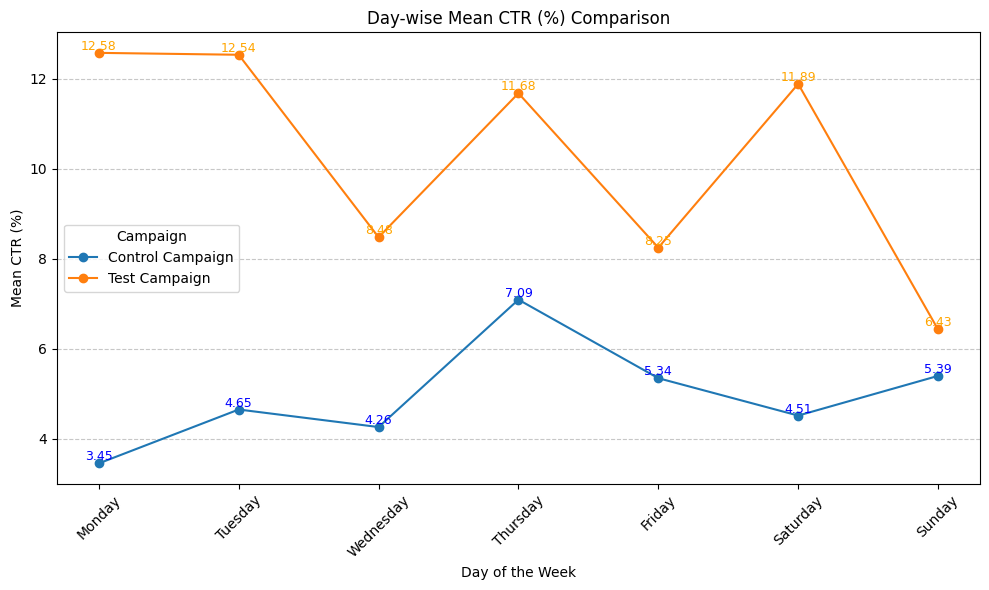

In [37]:
# Define the correct calendar order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by 'Day' and calculate mean CTR for both campaigns
control_daywise_ctr = control.groupby('Day')['CTR_%'].mean()
test_daywise_ctr = test.groupby('Day')['CTR_%'].mean()

# Combine the results into a single DataFrame for comparison
daywise_ctr_comparison = pd.DataFrame({
    'Control Campaign': control_daywise_ctr,
    'Test Campaign': test_daywise_ctr
})

# Reorder the index to match calendar order
daywise_ctr_comparison.index = pd.Categorical(daywise_ctr_comparison.index, categories=day_order, ordered=True)
daywise_ctr_comparison = daywise_ctr_comparison.sort_index()

# Plot the results using a line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daywise_ctr_comparison.index, daywise_ctr_comparison['Control Campaign'], marker='o', label='Control Campaign')
plt.plot(daywise_ctr_comparison.index, daywise_ctr_comparison['Test Campaign'], marker='o', label='Test Campaign')

# Add labels on top of the points
for i, txt in enumerate(daywise_ctr_comparison['Control Campaign']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', fontsize=9, color='blue')
for i, txt in enumerate(daywise_ctr_comparison['Test Campaign']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', fontsize=9, color='orange')

# Add plot details
plt.title('Day-wise Mean CTR (%) Comparison')
plt.xlabel('Day of the Week')
plt.ylabel('Mean CTR (%)')
plt.xticks(rotation=45)
plt.legend(title='Campaign')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


- The Test Campaign consistently outperforms the Control Campaign across all days.
- The gap between the two campaigns is most significant on Monday and Friday, suggesting the Test Campaign performs particularly well on these days.

### Comparison of campaign with respect to CPP and Conversion rate

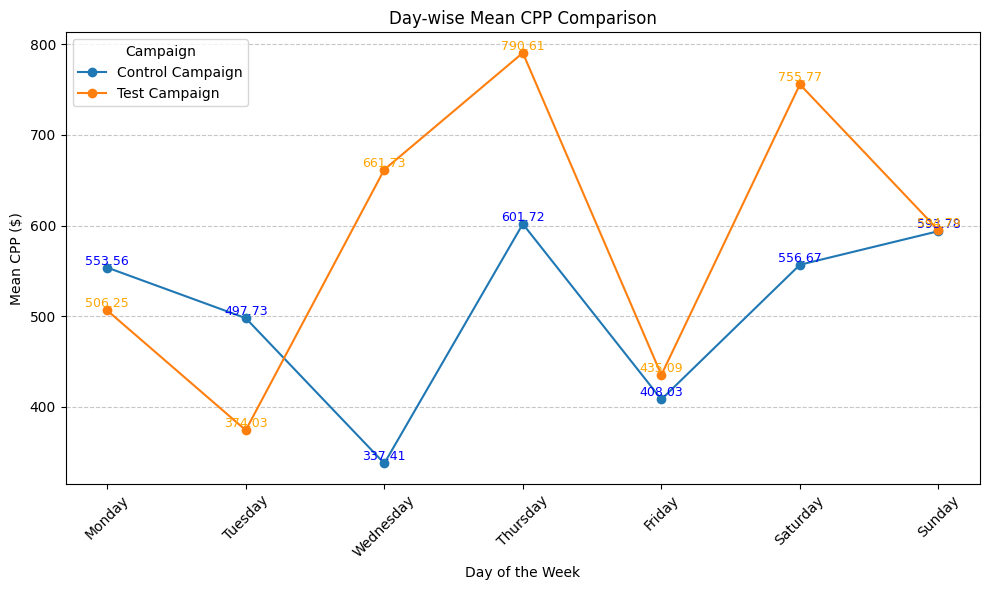

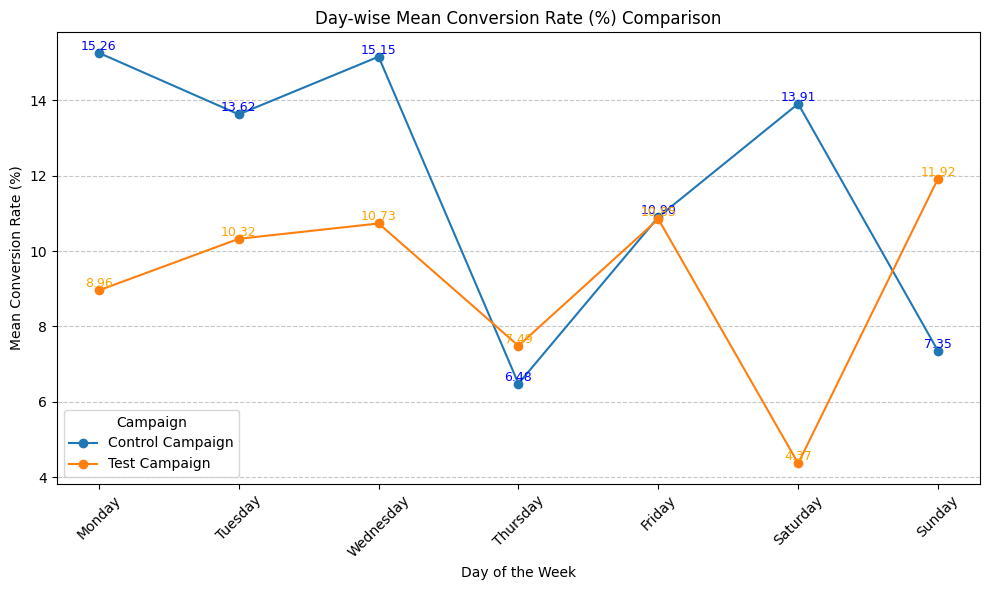

In [38]:
# Define the correct calendar order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by 'Day' and calculate mean CPP and Conversion Rate for both campaigns
control_daywise_cpp = control.groupby('Day')['CPP'].mean()
test_daywise_cpp = test.groupby('Day')['CPP'].mean()

control_daywise_conversion = control.groupby('Day')['Conversion_Rate_%'].mean()
test_daywise_conversion = test.groupby('Day')['Conversion_Rate_%'].mean()

# Combine the results into separate DataFrames for CPP and Conversion Rate
daywise_cpp_comparison = pd.DataFrame({
    'Control Campaign': control_daywise_cpp,
    'Test Campaign': test_daywise_cpp
})

daywise_conversion_comparison = pd.DataFrame({
    'Control Campaign': control_daywise_conversion,
    'Test Campaign': test_daywise_conversion
})

# Reorder the indices to match calendar order
daywise_cpp_comparison.index = pd.Categorical(daywise_cpp_comparison.index, categories=day_order, ordered=True)
daywise_cpp_comparison = daywise_cpp_comparison.sort_index()

daywise_conversion_comparison.index = pd.Categorical(daywise_conversion_comparison.index, categories=day_order, ordered=True)
daywise_conversion_comparison = daywise_conversion_comparison.sort_index()

# Plot CPP
plt.figure(figsize=(10, 6))
plt.plot(daywise_cpp_comparison.index, daywise_cpp_comparison['Control Campaign'], marker='o', label='Control Campaign')
plt.plot(daywise_cpp_comparison.index, daywise_cpp_comparison['Test Campaign'], marker='o', label='Test Campaign')

# Add labels on top of the points for CPP
for i, txt in enumerate(daywise_cpp_comparison['Control Campaign']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', fontsize=9, color='blue')
for i, txt in enumerate(daywise_cpp_comparison['Test Campaign']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', fontsize=9, color='orange')

# Add plot details for CPP
plt.title('Day-wise Mean CPP Comparison')
plt.xlabel('Day of the Week')
plt.ylabel('Mean CPP ($)')
plt.xticks(rotation=45)
plt.legend(title='Campaign')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Conversion Rate
plt.figure(figsize=(10, 6))
plt.plot(daywise_conversion_comparison.index, daywise_conversion_comparison['Control Campaign'], marker='o', label='Control Campaign')
plt.plot(daywise_conversion_comparison.index, daywise_conversion_comparison['Test Campaign'], marker='o', label='Test Campaign')

# Add labels on top of the points for Conversion Rate
for i, txt in enumerate(daywise_conversion_comparison['Control Campaign']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', fontsize=9, color='blue')
for i, txt in enumerate(daywise_conversion_comparison['Test Campaign']):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', fontsize=9, color='orange')

# Add plot details for Conversion Rate
plt.title('Day-wise Mean Conversion Rate (%) Comparison')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Conversion Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Campaign')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- CPP
    - The Control Campaign consistently has a more stable CPP across the week.
    - The Test Campaign experiences spikes on Thursday and Saturday, reducing its cost-effectiveness.
- Conversion Rate
    - The Control Campaign outperforms the Test Campaign on most days except Sunday and Friday.
    - The Test Campaign shows consistent improvement towards the weekend but drops significantly on Saturday. 

## Step-3:Hypothesis Testing

### Defining Hypothesis

#### Hypothesis check - 1

- Null Hypothesis (H₀):
    - There is no significant difference in the metric between the Control and Test campaigns.

- Alternative Hypothesis (H₁):
    - There is a significant difference in the metric between the two campaigns.

In [39]:
from scipy.stats import ttest_ind

# Perform t-tests
for metric in metrics:
    stat, p_value = ttest_ind(control[metric], test[metric], equal_var=False)
    print(f"{metric}: t-statistic = {stat}, p-value = {p_value}")


CTR_%: t-statistic = -3.978205357154195, p-value = 0.0003392324964184704
Conversion_Rate_%: t-statistic = 1.4905286923263779, p-value = 0.1426462344937022
CPP: t-statistic = -1.3135740422209055, p-value = 0.19455292866693438


- CTR
    - t-Statistic (-3.978):
        - The negative value means that the CTR of the Test Campaign is higher than the Control Campaign.
        - The large magnitude of the t-statistic suggests a strong difference between the two campaigns.
    - p-Value (0.0003):
        - Since p<0.05, we reject the null hypothesis.

 We can conclude that the Test Campaign has a significantly higher CTR than the Control Campaign.

- Conversion Rate (%)
    - t-Statistic (1.491):
        - The positive value indicates that the Conversion Rate of the Test Campaign is slightly higher than that of the Control Campaign.
        - However, the magnitude of the t-statistic is small, suggesting that the difference between the two campaigns is not substantial relative to the variability in the data.
    - p-Value (0.1426):
        - Since p≥0.05, we fail to reject the null hypothesis

The observed difference in Conversion Rate between the Test Campaign and the Control Campaign is not statistically significant.
This means there is insufficient evidence to conclude that one campaign has a better Conversion Rate than the other.

- Cost per Purchase (CPP)
    - t-Statistic (-1.314):
        - The negative value indicates that the CPP of the Control Campaign is slightly lower (more cost-effective) than the Test Campaign.
        - However, the magnitude of the t-statistic is small, suggesting that this difference is not significant when compared to the variability in the data.
    - p-Value (0.1946):
        - Since p≥0.05, we fail to reject the null hypothesis.
      
The observed difference in CPP between the Test Campaign and the Control Campaign is not statistically significant.
This means there is insufficient evidence to conclude that one campaign is more cost-effective than the other.


#### Hypotehsis check - 2

- Null Hypothesis (H₀):
    - There is no significant difference in the metric between the Control and Test campaigns during weekends

- Alternative Hypothesis (H₁):
    - There is a significant difference in the metric between the two campaigns during weekends.


In [40]:
from scipy.stats import ttest_ind

# Filter weekend data
control_weekend = df_control_gp[df_control_gp['Is_Weekend'] == True]
test_weekend = df_test_gp[df_test_gp['Is_Weekend'] == True]

# Metrics to test
metrics = ['CTR_%', 'Conversion_Rate_%', 'CPP']

# Perform t-tests for each metric
print("Weekend Performance Hypothesis Testing")
for metric in metrics:
    stat, p_value = ttest_ind(control_weekend[metric], test_weekend[metric], equal_var=False)
    print(f"{metric}: t-statistic = {stat:.3f}, p-value = {p_value:.3f}")


Weekend Performance Hypothesis Testing
CTR_%: t-statistic = -2.116, p-value = 0.066
Conversion_Rate_%: t-statistic = 0.613, p-value = 0.551
CPP: t-statistic = -0.866, p-value = 0.401


- CTR:
    - While the Test Campaign appears to have a slightly higher CTR, the difference is not statistically significant during weekends.
    - The campaigns perform similarly in terms of CTR.
- Conversion Rate:
    - Both campaigns perform similarly in terms of Conversion Rate during weekends, with no significant difference.
- CPP:
    - Both campaigns have comparable CPP during weekends, with no significant cost-effectiveness difference.

#### Hypothesis check- 3


- Null Hypothesis (H₀):
    - There is no significant difference in the metric between the Control and Test campaigns during weekdays
- Alternative Hypothesis (H₁):
    - There is a significant difference in the metric between the two campaigns during weekdays. 


In [41]:
from scipy.stats import ttest_ind

# Filter weekday data
control_weekday = control[control['Is_Weekend'] == False]
test_weekday = test[test['Is_Weekend'] == False]

# Metrics to test
metrics = ['CTR_%', 'Conversion_Rate_%', 'CPP']

# Calculate mean metrics for weekdays
control_means_weekday = control_weekday[metrics].mean()
test_means_weekday = test_weekday[metrics].mean()

# Perform t-tests for each metric
print("Weekday Performance Hypothesis Testing")
for metric in metrics:
    stat, p_value = ttest_ind(control_weekday[metric], test_weekday[metric], equal_var=False)
    print(f"{metric}: t-statistic = {stat:.3f}, p-value = {p_value:.3f}")

# Display mean metrics
print("\nMean Metrics (Weekdays):")
print("Control Campaign:\n", control_means_weekday)
print("Test Campaign:\n", test_means_weekday)


Weekday Performance Hypothesis Testing
CTR_%: t-statistic = -3.372, p-value = 0.002
Conversion_Rate_%: t-statistic = 1.470, p-value = 0.151
CPP: t-statistic = -1.045, p-value = 0.303

Mean Metrics (Weekdays):
Control Campaign:
 CTR_%                  5.149524
Conversion_Rate_%     11.800952
CPP                  478.572857
dtype: float64
Test Campaign:
 CTR_%                 10.635909
Conversion_Rate_%      9.625000
CPP                  558.933636
dtype: float64


- CTR (%):
    - t-statistic = -3.372, p-value = 0.002:
        - Since p<0.05, we reject the null hypothesis.
        - There is a statistically significant difference in CTR between the Control and Test campaigns during weekdays.
        - The negative t-statistic indicates that the CTR of the Test Campaign (10.64%) is significantly higher than the Control Campaign (5.15%).

- Conversion Rate (%):
    - t-statistic = 1.470, p-value = 0.151:
        - Since p≥0.05, we fail to reject the null hypothesis.
        - There is no statistically significant difference in Conversion Rate between the campaigns during weekdays.
        - The positive t-statistic suggests that the Control Campaign (11.80%) has a slightly higher Conversion Rate than the Test Campaign (9.63%), but this difference is not significant.

- CPP (Cost per Purchase):
    - t-statistic = -1.045, p-value = 0.303:
        - Since p≥0.05, we fail to reject the null hypothesis.
        - There is no statistically significant difference in CPP between the campaigns during weekdays.
        - The negative t-statistic suggests that the Control Campaign ($478.57) is slightly more cost-effective than the Test Campaign ($558.93), but this difference is not significant.

## Step-4:Conclusion and Future Action Plan

Based on the analysis, the Test Campaign is the better-performing campaign due to its significantly higher CTR on weekdays, which indicates stronger user engagement. However, improvements are needed to capitalize on this strength and address weaker areas such as Conversion Rate and CPP.


1. CTR:
   - The Test Campaign consistently outperforms the Control Campaign in CTR during weekdays and overall.
   - There is no significant difference during weekends.
2. Conversion Rate:
   - No significant differences between the campaigns during both weekdays and weekends.
   - Control Campaign slightly edges out in Conversion Rate.
3. CPP (Cost per Purchase):
   - Both campaigns perform similarly in terms of cost-effectiveness (CPP) during weekdays and weekends.
   - The Control Campaign appears slightly more cost-effective but not significantly.


### Future Action Plan

1. **Scale the Test Campaign**:
    - Increase the budget and focus on weekdays to leverage the Test Campaign's superior CTR.
    - Prioritize high-performing days such as Monday, Thursday, and Friday.
2. **Optimize Conversion Rate**:
    - Refine landing pages, CTAs, and the checkout process to improve conversion efficiency for the Test Campaign.
    - Run A/B tests to identify factors driving higher conversions.
3. **Enhance Weekend Performance**:
    - Experiment with new creatives and targeting strategies for the Test Campaign to boost weekend CTR.
    - Retarget weekday audiences during weekends to improve engagement and conversions.
4. **Reduce CPP for the Test Campaign:**:
    - Narrow targeting to high-converting audience segments.
    - Optimize bidding strategies to focus on cost-per-conversion rather than cost-per-click.
5. **Run Continuous A/B Testing**:
    - Test additional creative variations, landing page designs, and ad schedules to refine the Test Campaign further.
6. **Monitor and Adjust**:
    - Set up real-time dashboards to track CTR, Conversion Rate, and CPP for both campaigns.
    - Revisit the Control Campaign periodically for potential improvements.

The Test Campaign is the better choice due to its ability to drive higher engagement (CTR). By focusing on improving its Conversion Rate and reducing CPP, this campaign can deliver even better results. Implementing the above action plan will ensure the Test Campaign's strengths are maximized while addressing its weaker areas.